# 7. MACHINE LEARNING DATA PREPARATION

(by Gjorgji Noveski, JSI, Slovenia and Marija Markovska Dimitrovska, FEEIT, Macedonia)

Machine Learning data preparation is the process of preparing raw data that it is suitable for Machine Learning algorithms.The goal of data preparation is to ensure that the data is accurate, complete, and consistent, and that it is in a format that can be used effectively by the algorithms. By preparing the data properly, you can improve the accuracy and effectiveness of the model, leading to better insights and predictions.

Some key steps involved in machine learning data preparation are:

- **Data Collection**: This is the first step in the data preparation process. Data can be collected from various sources such as databases, APIs, web scraping, and surveys;
- **Data Cleaning**: In this step, you remove irrelevant or duplicate data, correct errors, and fill in missing values;
- **Data Labelig**: Also known as data annotation, this involves adding target attributes to data and labeling them so that a Machine Learning model can learn what predictions it is expected to make.
- **Feature Extraction**: This step involves selecting and extracting the relevant features from the data that are likely to have an impact on the model's performance;
- **Data Splitting**: Once the data is prepared, it is divided into training, validation, and testing sets;
- **Data Augmentation**: This step involves creating additional data by adding noise, rotating, or flipping existing data, to increase the size of the training set and improve the robustness of the model.

In this chapter, all of the mentioned key steps will be considered. To get started, you have to import some packages which will help you in data preparation. These packages, or libraries, are:
- **pandas** for working with tabular data;
- **numpy** for the mathematical operations;
- **sklearn** for the Machine Learning algorithms and other handy functions;
- **matplotlib** for displaying plots and graphs;
- **skimage** for image processing.

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from skimage import io 
from skimage import transform
from skimage.transform import rotate, AffineTransform
from skimage.util import random_noise
from skimage.filters import gaussian 

## 7.1. Data Collection

Here, a small data set will be used. It is collected from a survey performed into two different high schools. In this dataset there is information present for each student such as: his/her name, age, sex, their height in centimeters, which high school are they attending and their average grade (1 is lowest, 5 is the highest).

The first step is loading the dataset. You should print it to see what you are working with. If the dataset is big, you can print just the up head of the dataset using the command **dataset.head()**.

In [95]:
dataset = pd.read_csv('https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/07/sample_dataset.txt')
dataset

Full name   age sex  height               school  average grade
0       Roberta Guzman  14.0   f  150.00  High school Charles            3.5
1   Christina Griffith  14.0   f  166.00  High school Charles            3.3
2       Harvey Aguilar  35.0   m  152.00  High school Charles            2.0
3           Vicky Mack  18.0   f  158.00  High school Charles            2.5
4       Kelley Freeman  18.0   f  167.00  High school Charles            4.5
5         Robin Horton  17.0   f  160.00  High school Charles            4.0
6        Margie Steele  15.0   f     NaN  High school Charles            3.0
7        Verna Holland  17.0   f  170.00  High school Charles            3.1
8         Lenny Parker  17.0   m  182.00  High school Charles           10.1
9        Marvin Massey  16.0   m  172.00  High school Charles            3.7
10         Glenn Greer  18.0   m  180.00  High school Charles            2.9
11         Glenn Greer  18.0   m  180.00  High school Charles            2.9
12        Fannie Ortiz  15.0   f  164.00  High school Charles            2.8
13          Jerry Soto  14.0   m  168.00   High school Wimble            4.6
14        Stuart Perez  14.0   m  172.00   High school Wimble            4.7
15         Grace Marsh  15.0   f  173.00   High school Wimble            4.6
16      Silvia Sherman  16.0   f  177.00   High school Wimble            5.0
17       Amber Spencer  16.0   f  176.00   High school Wimble            4.9
18       Hubert Parker  15.0   m    1.65   High school Wimble            4.3
19      Eileen Gardner  17.0   f  168.00   High school Wimble            3.9
20       Wayne Summers  17.0   m  183.00   High school Wimble            3.8
21       Wayne Summers  17.0   m  183.00   High school Wimble            3.8
22          Luis Allen  14.0   m  173.00   High school Wimble            4.0
23      Delores Santos  15.0   f  172.00   High school Wimble            4.8
24         Hugh Newton   NaN   m  184.00   High school Wimble            4.8
25      Bradley Hudson  15.0   m    1.61   High school Wimble            6.1
26   Lawrence Sandoval  17.0   m  152.00   High school Wimble            4.2
27     Herbert Perkins  18.0   m  154.00   High school Wimble            4.3
28      Rafael Aguilar  16.0   m  178.00   High school Wimble            5.0
29    Ericka Ruebbling  17.0   f  160.00   High school Wimble            4.5
30         Juan Burich  17.0   m  184.00   High school Wimble            3.8

If yu look at the printed data you can notice that:
- The dataset contains some empty cells: "height" in row 6, "age" in row 24 and "school" in row 28;
- The dataset contains wrong data:"age" in row 2 (this age is not logical for a high school student), "average grade" in row 8 and row 25 (the average grade should be between 1 and 5) and "height" in row 18 and row 25 (the height should be in centimeters not in meters).
- The dataset contains duplicates: row 10 and row 11, and row 20 and row 21;

Hence, before you perform some analysis on the dataset, the data should be cleaned. 

## 7.2. Data Cleaning

### 7.2.1. Empty cells

Empty cells can potentially give you wrong results when analyzing data. There are different ways to deal with empty cells.

#### 7.2.1.1. Remove rows

Removing rows that contain empty cells is usually okay, since the datasets can be very big, it will not have a big impact on the result.

In [96]:
dataset1=dataset.dropna()
dataset1

Full name   age sex  height               school  average grade
0       Roberta Guzman  14.0   f  150.00  High school Charles            3.5
1   Christina Griffith  14.0   f  166.00  High school Charles            3.3
2       Harvey Aguilar  35.0   m  152.00  High school Charles            2.0
3           Vicky Mack  18.0   f  158.00  High school Charles            2.5
4       Kelley Freeman  18.0   f  167.00  High school Charles            4.5
5         Robin Horton  17.0   f  160.00  High school Charles            4.0
7        Verna Holland  17.0   f  170.00  High school Charles            3.1
8         Lenny Parker  17.0   m  182.00  High school Charles           10.1
9        Marvin Massey  16.0   m  172.00  High school Charles            3.7
10         Glenn Greer  18.0   m  180.00  High school Charles            2.9
11         Glenn Greer  18.0   m  180.00  High school Charles            2.9
12        Fannie Ortiz  15.0   f  164.00  High school Charles            2.8
13          Jerry Soto  14.0   m  168.00   High school Wimble            4.6
14        Stuart Perez  14.0   m  172.00   High school Wimble            4.7
15         Grace Marsh  15.0   f  173.00   High school Wimble            4.6
16      Silvia Sherman  16.0   f  177.00   High school Wimble            5.0
17       Amber Spencer  16.0   f  176.00   High school Wimble            4.9
18       Hubert Parker  15.0   m    1.65   High school Wimble            4.3
19      Eileen Gardner  17.0   f  168.00   High school Wimble            3.9
20       Wayne Summers  17.0   m  183.00   High school Wimble            3.8
21       Wayne Summers  17.0   m  183.00   High school Wimble            3.8
22          Luis Allen  14.0   m  173.00   High school Wimble            4.0
23      Delores Santos  15.0   f  172.00   High school Wimble            4.8
25      Bradley Hudson  15.0   m    1.61   High school Wimble            6.1
26   Lawrence Sandoval  17.0   m  152.00   High school Wimble            4.2
27     Herbert Perkins  18.0   m  154.00   High school Wimble            4.3
28      Rafael Aguilar  16.0   m  178.00   High school Wimble            5.0
29    Ericka Ruebbling  17.0   f  160.00   High school Wimble            4.5
30         Juan Burich  17.0   m  184.00   High school Wimble            3.8

#### 7.2.1.2. Replace empty cells

Another way of dealing with empty cells is to insert a new value instead of removing the entire row.

For example you can replace empty values for one column. If you want to change the original DataFrame, use the **inplace = True** argument:

In [97]:
dataset = pd.read_csv('sample_dataset1.txt')
dataset['height'].fillna(175, inplace=True)
dataset

Full name   age sex  height               school  average grade
0       Roberta Guzman  14.0   f  150.00  High school Charles            3.5
1   Christina Griffith  14.0   f  166.00  High school Charles            3.3
2       Harvey Aguilar  35.0   m  152.00  High school Charles            2.0
3           Vicky Mack  18.0   f  158.00  High school Charles            2.5
4       Kelley Freeman  18.0   f  167.00  High school Charles            4.5
5         Robin Horton  17.0   f  160.00  High school Charles            4.0
6        Margie Steele  15.0   f  175.00  High school Charles            3.0
7        Verna Holland  17.0   f  170.00  High school Charles            3.1
8         Lenny Parker  17.0   m  182.00  High school Charles           10.1
9        Marvin Massey  16.0   m  172.00  High school Charles            3.7
10         Glenn Greer  18.0   m  180.00  High school Charles            2.9
11         Glenn Greer  18.0   m  180.00  High school Charles            2.9
12        Fannie Ortiz  15.0   f  164.00  High school Charles            2.8
13          Jerry Soto  14.0   m  168.00   High school Wimble            4.6
14        Stuart Perez  14.0   m  172.00   High school Wimble            4.7
15         Grace Marsh  15.0   f  173.00   High school Wimble            4.6
16      Silvia Sherman  16.0   f  177.00   High school Wimble            5.0
17       Amber Spencer  16.0   f  176.00   High school Wimble            4.9
18       Hubert Parker  15.0   m    1.65   High school Wimble            4.3
19      Eileen Gardner  17.0   f  168.00   High school Wimble            3.9
20       Wayne Summers  17.0   m  183.00   High school Wimble            3.8
21       Wayne Summers  17.0   m  183.00   High school Wimble            3.8
22          Luis Allen  14.0   m  173.00   High school Wimble            4.0
23      Delores Santos  15.0   f  172.00   High school Wimble            4.8
24         Hugh Newton   NaN   m  184.00   High school Wimble            4.8
25      Bradley Hudson  15.0   m    1.61   High school Wimble            6.1
26   Lawrence Sandoval  17.0   m  152.00   High school Wimble            4.2
27     Herbert Perkins  18.0   m  154.00   High school Wimble            4.3
28      Rafael Aguilar  16.0   m  178.00   High school Wimble            5.0
29    Ericka Ruebbling  17.0   f  160.00   High school Wimble            4.5
30         Juan Burich  17.0   m  184.00   High school Wimble            3.8

A common way to replace emmpty cells is to calculate the mean, median, or mode value of the column. For example lets replace the empty cells in the column "age" with the mode value (the value that appears most frequently).

In [98]:
a=dataset["age"].mode()[0]
dataset["age"].fillna(a,inplace=True)
dataset

Full name   age sex  height               school  average grade
0       Roberta Guzman  14.0   f  150.00  High school Charles            3.5
1   Christina Griffith  14.0   f  166.00  High school Charles            3.3
2       Harvey Aguilar  35.0   m  152.00  High school Charles            2.0
3           Vicky Mack  18.0   f  158.00  High school Charles            2.5
4       Kelley Freeman  18.0   f  167.00  High school Charles            4.5
5         Robin Horton  17.0   f  160.00  High school Charles            4.0
6        Margie Steele  15.0   f  175.00  High school Charles            3.0
7        Verna Holland  17.0   f  170.00  High school Charles            3.1
8         Lenny Parker  17.0   m  182.00  High school Charles           10.1
9        Marvin Massey  16.0   m  172.00  High school Charles            3.7
10         Glenn Greer  18.0   m  180.00  High school Charles            2.9
11         Glenn Greer  18.0   m  180.00  High school Charles            2.9
12        Fannie Ortiz  15.0   f  164.00  High school Charles            2.8
13          Jerry Soto  14.0   m  168.00   High school Wimble            4.6
14        Stuart Perez  14.0   m  172.00   High school Wimble            4.7
15         Grace Marsh  15.0   f  173.00   High school Wimble            4.6
16      Silvia Sherman  16.0   f  177.00   High school Wimble            5.0
17       Amber Spencer  16.0   f  176.00   High school Wimble            4.9
18       Hubert Parker  15.0   m    1.65   High school Wimble            4.3
19      Eileen Gardner  17.0   f  168.00   High school Wimble            3.9
20       Wayne Summers  17.0   m  183.00   High school Wimble            3.8
21       Wayne Summers  17.0   m  183.00   High school Wimble            3.8
22          Luis Allen  14.0   m  173.00   High school Wimble            4.0
23      Delores Santos  15.0   f  172.00   High school Wimble            4.8
24         Hugh Newton  17.0   m  184.00   High school Wimble            4.8
25      Bradley Hudson  15.0   m    1.61   High school Wimble            6.1
26   Lawrence Sandoval  17.0   m  152.00   High school Wimble            4.2
27     Herbert Perkins  18.0   m  154.00   High school Wimble            4.3
28      Rafael Aguilar  16.0   m  178.00   High school Wimble            5.0
29    Ericka Ruebbling  17.0   f  160.00   High school Wimble            4.5
30         Juan Burich  17.0   m  184.00   High school Wimble            3.8

### 7.2.2. Wrong data

Sometimes you can notice wrong data by looking in the dataset, because you have expectation what it should be. For example, some students enetred their height in meters instead in centimeters. You can fix these wrong values by replacing them with the corect ones (165 instead of 1.65 and 161 instead of 1.61). If the dataset is small (like this) you can replace these values one by one. For larger datasets you can create some rules, e.g. set some boundaris for legal values, and replace the values that are outside of the boundaries. Lets try this second option. You can create the rule: "if the height is less than 3 (meaning it is entered in meters), then multiply it by 100 to convert to centimeters".

You can try the first option (replace values one by one) by your own.

In [99]:
for x in dataset.index:
    if dataset.loc[x, "height"]<3:
        dataset.loc[x,"height"]=dataset.loc[x,"height"]*100
dataset

Full name   age sex  height               school  average grade
0       Roberta Guzman  14.0   f   150.0  High school Charles            3.5
1   Christina Griffith  14.0   f   166.0  High school Charles            3.3
2       Harvey Aguilar  35.0   m   152.0  High school Charles            2.0
3           Vicky Mack  18.0   f   158.0  High school Charles            2.5
4       Kelley Freeman  18.0   f   167.0  High school Charles            4.5
5         Robin Horton  17.0   f   160.0  High school Charles            4.0
6        Margie Steele  15.0   f   175.0  High school Charles            3.0
7        Verna Holland  17.0   f   170.0  High school Charles            3.1
8         Lenny Parker  17.0   m   182.0  High school Charles           10.1
9        Marvin Massey  16.0   m   172.0  High school Charles            3.7
10         Glenn Greer  18.0   m   180.0  High school Charles            2.9
11         Glenn Greer  18.0   m   180.0  High school Charles            2.9
12        Fannie Ortiz  15.0   f   164.0  High school Charles            2.8
13          Jerry Soto  14.0   m   168.0   High school Wimble            4.6
14        Stuart Perez  14.0   m   172.0   High school Wimble            4.7
15         Grace Marsh  15.0   f   173.0   High school Wimble            4.6
16      Silvia Sherman  16.0   f   177.0   High school Wimble            5.0
17       Amber Spencer  16.0   f   176.0   High school Wimble            4.9
18       Hubert Parker  15.0   m   165.0   High school Wimble            4.3
19      Eileen Gardner  17.0   f   168.0   High school Wimble            3.9
20       Wayne Summers  17.0   m   183.0   High school Wimble            3.8
21       Wayne Summers  17.0   m   183.0   High school Wimble            3.8
22          Luis Allen  14.0   m   173.0   High school Wimble            4.0
23      Delores Santos  15.0   f   172.0   High school Wimble            4.8
24         Hugh Newton  17.0   m   184.0   High school Wimble            4.8
25      Bradley Hudson  15.0   m   161.0   High school Wimble            6.1
26   Lawrence Sandoval  17.0   m   152.0   High school Wimble            4.2
27     Herbert Perkins  18.0   m   154.0   High school Wimble            4.3
28      Rafael Aguilar  16.0   m   178.0   High school Wimble            5.0
29    Ericka Ruebbling  17.0   f   160.0   High school Wimble            4.5
30         Juan Burich  17.0   m   184.0   High school Wimble            3.8

Other example is the age of the students. The age of a high school students should be under or equal to 18 years. Hence,  35 years is obviously a wrong data. The row that contains this age should be removed. 

In [100]:
for x in dataset.index:
    if dataset.loc[x, "age"] > 18:
        dataset.drop(x, inplace = True)
dataset

Full name   age sex  height               school  average grade
0       Roberta Guzman  14.0   f   150.0  High school Charles            3.5
1   Christina Griffith  14.0   f   166.0  High school Charles            3.3
3           Vicky Mack  18.0   f   158.0  High school Charles            2.5
4       Kelley Freeman  18.0   f   167.0  High school Charles            4.5
5         Robin Horton  17.0   f   160.0  High school Charles            4.0
6        Margie Steele  15.0   f   175.0  High school Charles            3.0
7        Verna Holland  17.0   f   170.0  High school Charles            3.1
8         Lenny Parker  17.0   m   182.0  High school Charles           10.1
9        Marvin Massey  16.0   m   172.0  High school Charles            3.7
10         Glenn Greer  18.0   m   180.0  High school Charles            2.9
11         Glenn Greer  18.0   m   180.0  High school Charles            2.9
12        Fannie Ortiz  15.0   f   164.0  High school Charles            2.8
13          Jerry Soto  14.0   m   168.0   High school Wimble            4.6
14        Stuart Perez  14.0   m   172.0   High school Wimble            4.7
15         Grace Marsh  15.0   f   173.0   High school Wimble            4.6
16      Silvia Sherman  16.0   f   177.0   High school Wimble            5.0
17       Amber Spencer  16.0   f   176.0   High school Wimble            4.9
18       Hubert Parker  15.0   m   165.0   High school Wimble            4.3
19      Eileen Gardner  17.0   f   168.0   High school Wimble            3.9
20       Wayne Summers  17.0   m   183.0   High school Wimble            3.8
21       Wayne Summers  17.0   m   183.0   High school Wimble            3.8
22          Luis Allen  14.0   m   173.0   High school Wimble            4.0
23      Delores Santos  15.0   f   172.0   High school Wimble            4.8
24         Hugh Newton  17.0   m   184.0   High school Wimble            4.8
25      Bradley Hudson  15.0   m   161.0   High school Wimble            6.1
26   Lawrence Sandoval  17.0   m   152.0   High school Wimble            4.2
27     Herbert Perkins  18.0   m   154.0   High school Wimble            4.3
28      Rafael Aguilar  16.0   m   178.0   High school Wimble            5.0
29    Ericka Ruebbling  17.0   f   160.0   High school Wimble            4.5
30         Juan Burich  17.0   m   184.0   High school Wimble            3.8

The rows with average grade higher than 5 should also be removed.

In [101]:
for x in dataset.index:
    if dataset.loc[x, "average grade"] > 5:
        dataset.drop(x, inplace = True)
dataset

Full name   age sex  height               school  average grade
0       Roberta Guzman  14.0   f   150.0  High school Charles            3.5
1   Christina Griffith  14.0   f   166.0  High school Charles            3.3
3           Vicky Mack  18.0   f   158.0  High school Charles            2.5
4       Kelley Freeman  18.0   f   167.0  High school Charles            4.5
5         Robin Horton  17.0   f   160.0  High school Charles            4.0
6        Margie Steele  15.0   f   175.0  High school Charles            3.0
7        Verna Holland  17.0   f   170.0  High school Charles            3.1
9        Marvin Massey  16.0   m   172.0  High school Charles            3.7
10         Glenn Greer  18.0   m   180.0  High school Charles            2.9
11         Glenn Greer  18.0   m   180.0  High school Charles            2.9
12        Fannie Ortiz  15.0   f   164.0  High school Charles            2.8
13          Jerry Soto  14.0   m   168.0   High school Wimble            4.6
14        Stuart Perez  14.0   m   172.0   High school Wimble            4.7
15         Grace Marsh  15.0   f   173.0   High school Wimble            4.6
16      Silvia Sherman  16.0   f   177.0   High school Wimble            5.0
17       Amber Spencer  16.0   f   176.0   High school Wimble            4.9
18       Hubert Parker  15.0   m   165.0   High school Wimble            4.3
19      Eileen Gardner  17.0   f   168.0   High school Wimble            3.9
20       Wayne Summers  17.0   m   183.0   High school Wimble            3.8
21       Wayne Summers  17.0   m   183.0   High school Wimble            3.8
22          Luis Allen  14.0   m   173.0   High school Wimble            4.0
23      Delores Santos  15.0   f   172.0   High school Wimble            4.8
24         Hugh Newton  17.0   m   184.0   High school Wimble            4.8
26   Lawrence Sandoval  17.0   m   152.0   High school Wimble            4.2
27     Herbert Perkins  18.0   m   154.0   High school Wimble            4.3
28      Rafael Aguilar  16.0   m   178.0   High school Wimble            5.0
29    Ericka Ruebbling  17.0   f   160.0   High school Wimble            4.5
30         Juan Burich  17.0   m   184.0   High school Wimble            3.8

### 7.2.3. Duplicates

To discover duplicates in a dataset you can use the **duplicated()** method. This method returns a Boolean value for each row: **True** for every row that is duplicate, otherwise **False**.

In [102]:
print(dataset.duplicated())

0     False
1     False
3     False
4     False
5     False
6     False
7     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21     True
22    False
23    False
24    False
26    False
27    False
28    False
29    False
30    False
dtype: bool


To remove the dupliactes, you can use **drop_duplicated()** method.

In [103]:
dataset.drop_duplicates(inplace=True)
dataset

Full name   age sex  height               school  average grade
0       Roberta Guzman  14.0   f   150.0  High school Charles            3.5
1   Christina Griffith  14.0   f   166.0  High school Charles            3.3
3           Vicky Mack  18.0   f   158.0  High school Charles            2.5
4       Kelley Freeman  18.0   f   167.0  High school Charles            4.5
5         Robin Horton  17.0   f   160.0  High school Charles            4.0
6        Margie Steele  15.0   f   175.0  High school Charles            3.0
7        Verna Holland  17.0   f   170.0  High school Charles            3.1
9        Marvin Massey  16.0   m   172.0  High school Charles            3.7
10         Glenn Greer  18.0   m   180.0  High school Charles            2.9
12        Fannie Ortiz  15.0   f   164.0  High school Charles            2.8
13          Jerry Soto  14.0   m   168.0   High school Wimble            4.6
14        Stuart Perez  14.0   m   172.0   High school Wimble            4.7
15         Grace Marsh  15.0   f   173.0   High school Wimble            4.6
16      Silvia Sherman  16.0   f   177.0   High school Wimble            5.0
17       Amber Spencer  16.0   f   176.0   High school Wimble            4.9
18       Hubert Parker  15.0   m   165.0   High school Wimble            4.3
19      Eileen Gardner  17.0   f   168.0   High school Wimble            3.9
20       Wayne Summers  17.0   m   183.0   High school Wimble            3.8
22          Luis Allen  14.0   m   173.0   High school Wimble            4.0
23      Delores Santos  15.0   f   172.0   High school Wimble            4.8
24         Hugh Newton  17.0   m   184.0   High school Wimble            4.8
26   Lawrence Sandoval  17.0   m   152.0   High school Wimble            4.2
27     Herbert Perkins  18.0   m   154.0   High school Wimble            4.3
28      Rafael Aguilar  16.0   m   178.0   High school Wimble            5.0
29    Ericka Ruebbling  17.0   f   160.0   High school Wimble            4.5
30         Juan Burich  17.0   m   184.0   High school Wimble            3.8

Now, you can perform some analysis on the cleaned dataset. 

What is the average height of the surveyed students?

In [104]:
x=dataset["height"].mean()
formated_x="{:.2f}".format(x)
print(f"The average height of the surveyed students is {formated_x} centimeters.")

The average height of the surveyed students is 169.27 centimeters.


What is the average grade of the surveyed students?

In [105]:
x=dataset["average grade"].mean()
formated_x="{:.2f}".format(x)
print(f"The average grade of the surveyed students is {formated_x}.")

The average grade of the surveyed students is 4.02.


Now, lets see how many different high schools are mentioned in the dataset.

In [106]:
nm_of_schools = len(dataset['school'].unique())
print(f"We have {nm_of_schools} schools present in the dataset, which are:")
for school in dataset['school'].unique():
    print(school)

We have 2 schools present in the dataset, which are:
High school Charles
High school Wimble


## 7.2. Data Labeling

Lets say for example you are a professor and want to have even more information from this dataset. In that case, one approach would be to add information if the student will pass or not according to their average grade. You can manually add another column in the dataset which will be called "Has passed" and will contain yes or no values, represented as ones and zeros respectfully.

In [107]:
dataset['has passed'] = np.empty(len(dataset), dtype=str)
dataset['has passed'] = np.where(dataset['average grade'] >= 3.5, 1, 0)
dataset

Full name   age sex  height               school  average grade  \
0       Roberta Guzman  14.0   f   150.0  High school Charles            3.5   
1   Christina Griffith  14.0   f   166.0  High school Charles            3.3   
3           Vicky Mack  18.0   f   158.0  High school Charles            2.5   
4       Kelley Freeman  18.0   f   167.0  High school Charles            4.5   
5         Robin Horton  17.0   f   160.0  High school Charles            4.0   
6        Margie Steele  15.0   f   175.0  High school Charles            3.0   
7        Verna Holland  17.0   f   170.0  High school Charles            3.1   
9        Marvin Massey  16.0   m   172.0  High school Charles            3.7   
10         Glenn Greer  18.0   m   180.0  High school Charles            2.9   
12        Fannie Ortiz  15.0   f   164.0  High school Charles            2.8   
13          Jerry Soto  14.0   m   168.0   High school Wimble            4.6   
14        Stuart Perez  14.0   m   172.0   High school Wimble            4.7   
15         Grace Marsh  15.0   f   173.0   High school Wimble            4.6   
16      Silvia Sherman  16.0   f   177.0   High school Wimble            5.0   
17       Amber Spencer  16.0   f   176.0   High school Wimble            4.9   
18       Hubert Parker  15.0   m   165.0   High school Wimble            4.3   
19      Eileen Gardner  17.0   f   168.0   High school Wimble            3.9   
20       Wayne Summers  17.0   m   183.0   High school Wimble            3.8   
22          Luis Allen  14.0   m   173.0   High school Wimble            4.0   
23      Delores Santos  15.0   f   172.0   High school Wimble            4.8   
24         Hugh Newton  17.0   m   184.0   High school Wimble            4.8   
26   Lawrence Sandoval  17.0   m   152.0   High school Wimble            4.2   
27     Herbert Perkins  18.0   m   154.0   High school Wimble            4.3   
28      Rafael Aguilar  16.0   m   178.0   High school Wimble            5.0   
29    Ericka Ruebbling  17.0   f   160.0   High school Wimble            4.5   
30         Juan Burich  17.0   m   184.0   High school Wimble            3.8   

    has passed  
0            1  
1            0  
3            0  
4            1  
5            1  
6            0  
7            0  
9            1  
10           0  
12           0  
13           1  
14           1  
15           1  
16           1  
17           1  
18           1  
19           1  
20           1  
22           1  
23           1  
24           1  
26           1  
27           1  
28           1  
29           1  
30           1

You can see that the dataset has additionally a column named "has passed". You may add additional columns in the future depending on what you are asked to do.

## 7.3. Feature Extraction

Feature extraction is the task of converting the features you already have in the dataset, into features that will be suitable for use by the Machine Learning algorithms. Since the algorithms are designed to better handle data which is in numerical format, the next step in this feature extraction will be just that, to transform the data into something numerical.

First, you should arrange the dataset into a python dictionary. You can do this, since the method that will convert the features into numerical features accepts dictionaries.

In [108]:
dataset_as_dictionary = []
for index, row in dataset.iterrows():
    row_dict = {}
    row_dict['Full name'] = row['Full name']
    row_dict['age'] = row['age']
    row_dict['sex'] = row['sex']
    row_dict['height'] = row['height']
    row_dict['school'] = row['school']
    row_dict['average grade'] = row['average grade']
    row_dict['has passed'] = row['has passed']
    dataset_as_dictionary.append(row_dict)

Use the **DictVectorizer** class of the sklearn library in order to achieve the goal of obtaining numerical features. Create an instance of that class and call the **fit_transform()** method that will analyze the data and convert it to numbers accordingly.

In [75]:
vect = DictVectorizer()
vect.fit_transform(dataset_as_dictionary).toarray()

array([[  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  14. ,
          3.5,   1. , 150. ,   1. ,   0. ,   1. ,   0. ],
       [  0. ,   1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,  14. ,
          3.3,   0. , 166. ,   1. ,   0. ,   1. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1. ,   0. ,  18. ,
          2.5,   0. , 158. ,   1. ,   0. ,   1. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   0. ,   

You can see that instead of having features in string representation, now they are transformed into a numerical representation.

## 7.4. Data Splitting

An important step when making Machine Learning models is splitting the data into a training dataset and a testing dataset.
You have to do this because if you train and test the Machine Learning model on the same dataset, then the results will not tell you how well your model is going to perform when presented with new and unseen data. So the solution is splitting the dataset into a training and testing dataset. Like the name suggests, one will be used only in the training part of the model, while you will get the metrics and make assumptions about the model when you run it on the testing dataset.

For this small dataset, it is possible to manually split the dataset into a train and test dataset. But, if you work with big datasets, this is going to become infeasible. You can use the helpful functionalities that the sklearn library gives, namely the **train_test_split()** function to automatically split the dataset. Since Machine Learning models take data as input and predict some target variable, you need to pass the same to the function.

For example, you want to be able to predict if a student has a passing grade. The input that you should provide to the Machine Learning model is the students general information, disregarding their average grade.

To do so, again transform the data into dictionaries which will be used for feature extraction, but only the data that you need as input to the model.

In [109]:
# FOR X
x_data_as_dictionary = []
for index, row in dataset.iterrows():
    row_dict = {}
    row_dict['Full name'] = row['Full name']
    row_dict['age'] = row['age']
    row_dict['sex'] = row['sex']
    row_dict['height'] = row['height']
    row_dict['school'] = row['school']
    
    x_data_as_dictionary.append(row_dict)
    

As for the target variable, you don't have to do any feature extraction, we can just use it as is. The target variable is the "has passed" column from the dataset.

In [110]:
vect = DictVectorizer()
x = vect.fit_transform(x_data_as_dictionary).toarray()
y = dataset.iloc[:, -1]

split the dataset into 4 parts:
- x_train is the input to the model during training;
- y_train is the target variable which will be used during training of the model;

- x_test is the input to the model when you want to make a prediction, or compute how well your model is performing;
- y_test is the target variable which you check to see if your model got right when it makes a prediction.

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Create an instance of the **Support Vector Machine** model with the help of the sklearn library. In the **fit()** function pass the data it needs during training.

In [112]:
MLModel = svm.SVC()
MLModel.fit(x_train, y_train)

SVC()

At the end, make a prediction about the data that you have in the testing dataset, each element representing if the student passed or not.

In [113]:
MLModel.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

## 7.5. Data augmentation

Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. It includes making minor changes to the dataset or generating new data points. 

Most common use case for data augmentation is in images. Some Machine Learning models are designed to take images as input. Images are represented as three dimensional arrays, one dimension being the width, second being the height and the third one is the color (red, green, blue). The values of the width and height arrays represent the pixel intensity of a specific color, and they range from 0 to 256.

In case of image augmentation, there are position transformations like:
- Flipping horizontally
- Flipping vertically
- Zooming
- Rotating
- Cropping
- etc.

and color transformations like:
- Brigthness
- Contrast
- etc.

Lets load a simple image and try some augmentation techniques.

In [82]:
image = io.imread('https://github.com/VALENCEML/eBOOK/raw/main/EN/07/flower.jpg')

(-0.5, 1279.5, 959.5, -0.5)

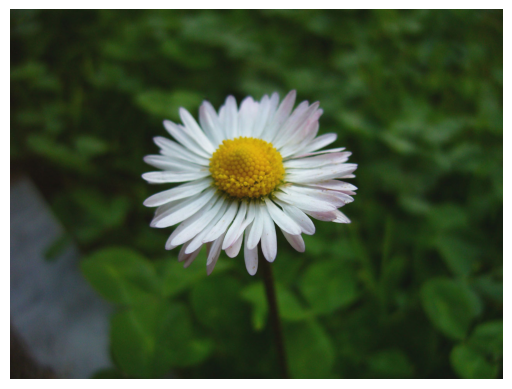

In [83]:
plt.imshow(image)
plt.axis('off')

### 7.5.1. Rotating

Rotate for angle of 45 degrees.

(-0.5, 1279.5, 959.5, -0.5)

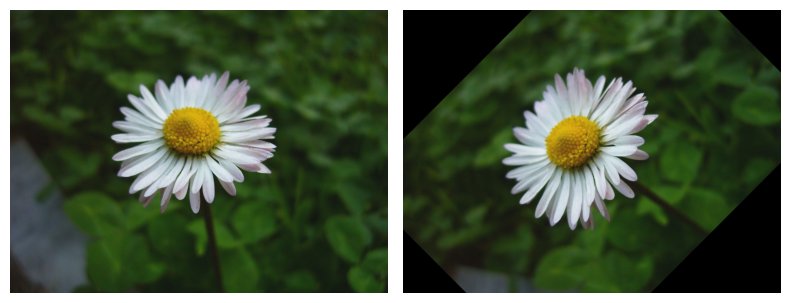

In [114]:
augmentation1=rotate(image, angle=45)
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation1)
plt.axis('off')

### 7.5.2. Rescaling

Rescale the image with 1.1.

(-0.5, 1407.5, 1055.5, -0.5)

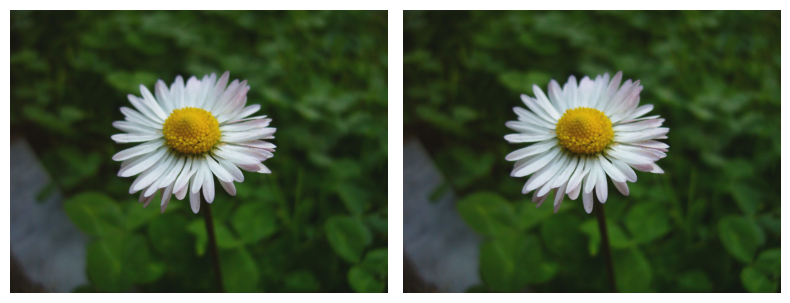

In [26]:
augmentation2=transform.rescale(image, 1.1)
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation2)
plt.axis('off')

### 7.5.3. Flipping Vertically

(-0.5, 1279.5, 959.5, -0.5)

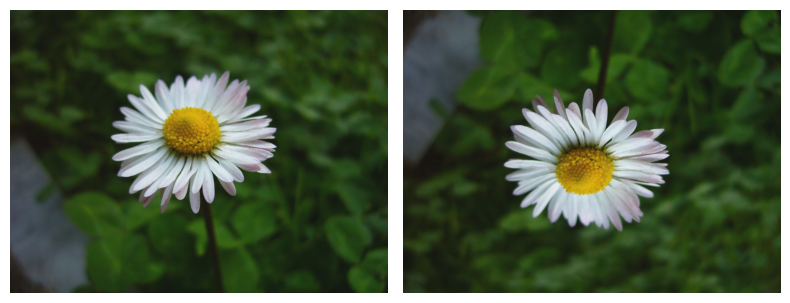

In [27]:
augmentation3=np.flipud(image)
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation3)
plt.axis('off')

### 7.5.4. Flipping Horizontally

(-0.5, 1279.5, 959.5, -0.5)

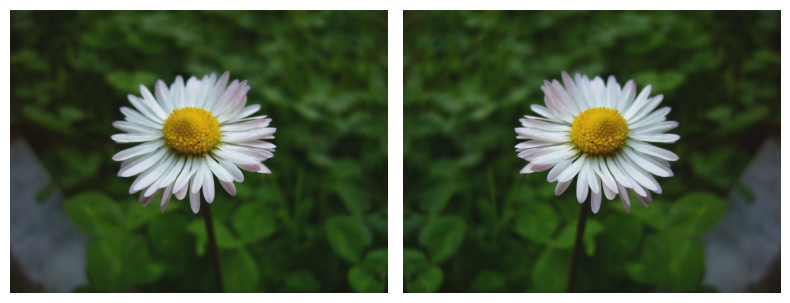

In [29]:
augmentation4=np.fliplr(image)
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation4)
plt.axis('off')

### 7.5.5. Cropping

Inspect the image shape.

In [53]:
image.shape

(960, 1280, 3)

Crop image height and width.

(-0.5, 599.5, 399.5, -0.5)

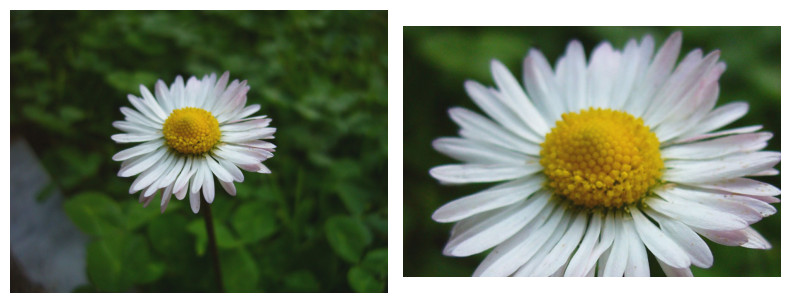

In [54]:
augmentation5=image[200:600,300:900]
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation5)
plt.axis('off')

### 7.5.6. Adding Random Noise

(-0.5, 1279.5, 959.5, -0.5)

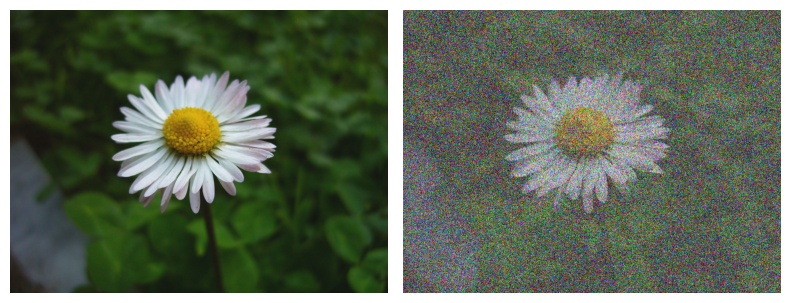

In [73]:
augmentation6=random_noise(image, var=0.1**0.1)
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation6)
plt.axis('off')

### 7.5.7. Changing Brigthness

For changing the brightness, you should first normalize the pixel values in the range from 0 to 1. To do so, you should divide the original values by 255 (as it is the maximum value).

(-0.5, 1279.5, 959.5, -0.5)

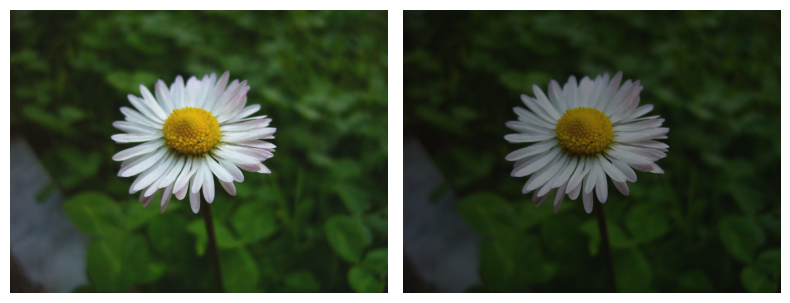

In [93]:
image1=image/255
augmentation7=image1*0.6
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation7)
plt.axis('off')

### 7.5.8. Inverting Intensity Range

The maximum pixel value becomes minimum (255 becomes 0), an vice versa.

(-0.5, 1279.5, 959.5, -0.5)

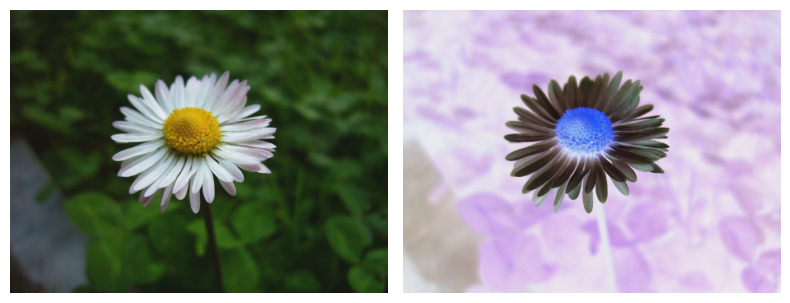

In [74]:
from skimage import util
augmentation8=util.invert(image)
fig=plt.figure(tight_layout='auto', figsize=(8,4))
fig.add_subplot(121)
plt.imshow(image)
plt.axis('off')
fig.add_subplot(122)
plt.imshow(augmentation8)
plt.axis('off')